In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('/home/argha/Documents/driver-head-pose/final_anirban_df.csv')

In [3]:
df

,datetime,x,y,z,level,acc,x_coord,y_coord,z_coord,rp_y,doppz
0,2022-08-08 16:34:10_0,-4.995534,-0.904843,0.051745,looking_forward,10.420763,"[0.24615450203418732, 0.12307725101709366, -0....","[0.21708786487579346, 0.30425509810447693, 1.0...","[0, 0, 0, 0]","[77.13893638889519, 92.21395414050549, 97.5054...","[[1708, 1667, 1482, 1615, 1788, 1698, 1624, 15..."
1,2022-08-08 16:34:10_1,-5.504651,-1.300178,0.057973,looking_forward,10.398018,"[0.24615450203418732, 0.12307725101709366, -0....","[0.21708786487579346, 0.30425509810447693, 1.0...","[0, 0, 0]","[77.02134654683894, 92.21395414050549, 97.5054...","[[1519, 1630, 1454, 1538, 1648, 1682, 1510, 17..."
2,2022-08-08 16:34:10_2,-9.451184,-2.177904,0.138686,looking_down,10.445304,"[0.24615450203418732, 0.12307725101709366, -0....","[0.21708786487579346, 0.30425509810447693, 1.0...","[0, 0, 0, 0]","[77.11541842048393, 92.21395414050549, 97.5054...","[[1761, 1649, 1600, 1515, 1524, 1591, 1704, 18..."
3,2022-08-08 16:34:11_0,-14.818779,-2.227685,0.252855,looking_down,10.420165,"[0.24615450203418732, 0.12307725101709366, -0....","[0.21708786487579346, 0.30425509810447693, 1.0...","[0, 0, 0, 0]","[77.18597232571769, 92.21395414050549, 97.5054...","[[1557, 1746, 1920, 1813, 1723, 1718, 1847, 19..."
4,2022-08-08 16:34:11_1,-16.892903,-1.576694,0.282570,looking_down,10.414778,"[0.24615450203418732, 0.12307725101709366, -0....","[0.21708786487579346, 0.30425509810447693, 1.0...","[0, 0, 0, 0]","[77.16245435730643, 92.21395414050549, 97.5054...","[[1343, 1500, 1733, 1714, 1724, 1663, 1731, 17..."
...,...,...,...,...,...,...,...,...,...,...,...
1398,2022-08-08 16:43:27_1,5.286767,8.807934,-0.522113,looking_forward,10.555437,"[0.24615450203418732, 0.12307725101709366, 0.0...","[0.21708786487579346, 0.30425509810447693, 0.5...","[0, 0, 0, 0]","[77.25652623095142, 92.8489392876092, 98.02289...","[[1603, 1695, 1666, 1717, 1752, 1734, 1803, 17..."
1399,2022-08-08 16:43:27_2,7.930543,8.837618,-1.110564,looking_up,10.566211,[0.9333357810974121],[2.0993151664733887],[0],"[77.30356216777392, 92.8019033507867, 98.02289...","[[1679, 1656, 1580, 1663, 1625, 1574, 1734, 18..."
1400,2022-08-08 16:43:28_0,8.174322,10.462146,-1.065180,looking_up_and_right,10.603920,"[0.24615450203418732, 0.12307725101709366, 1.0...","[0.21708786487579346, 0.30425509810447693, 2.0...","[0, 0, 0, 0, 0]","[77.35059810459641, 92.82542131919796, 98.0228...","[[1604, 1594, 1593, 1752, 1718, 1744, 1779, 16..."
1401,2022-08-08 16:43:28_1,6.500413,9.442617,-1.222051,looking_up_and_right,10.564415,"[0.24615450203418732, 0.12307725101709366, 1.1...","[0.21708786487579346, 0.30425509810447693, 2.1...","[0, 0, 0]","[77.35059810459641, 92.82542131919796, 98.0228...","[[1707, 1634, 1756, 1775, 1779, 1841, 1756, 18..."


<AxesSubplot:>

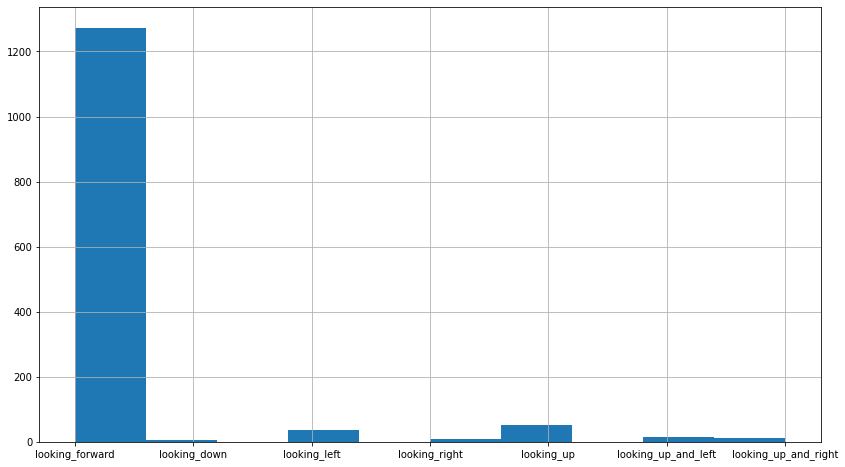

In [4]:
plt.figure(figsize=(14,8))
df['level'].hist()

In [5]:
rp_y, doppz = [], []

for r_y, d_z in zip(df['rp_y'], df['doppz']):
    rp_y.append(ast.literal_eval(r_y))
    doppz.append(ast.literal_eval(d_z))

In [6]:
doppz = np.array(doppz)

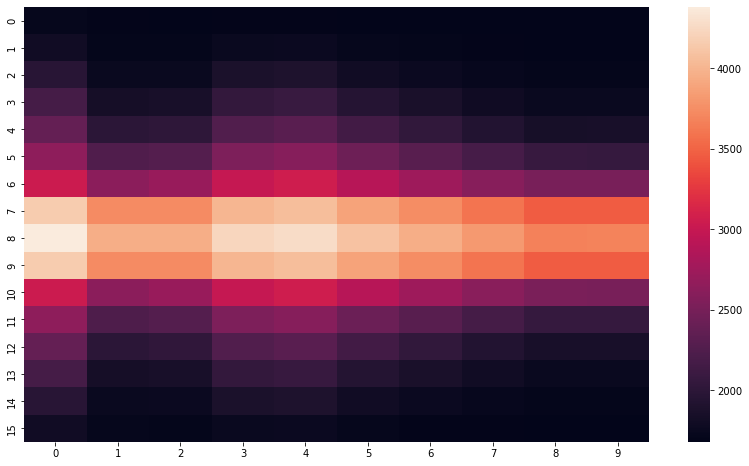

<AxesSubplot:>

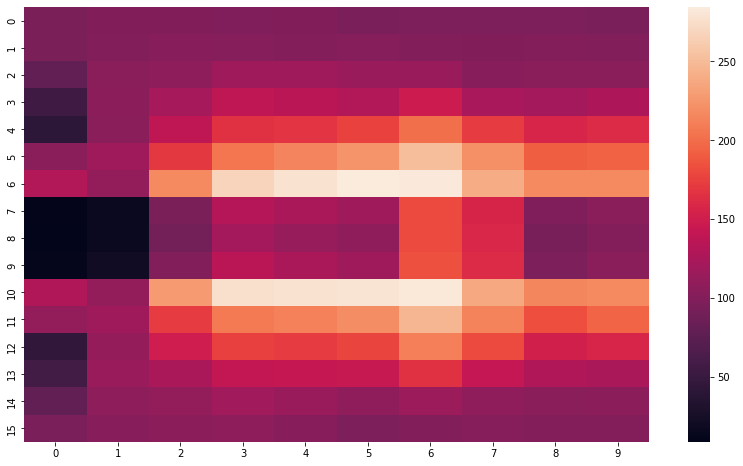

In [7]:
plt.figure(figsize=(14,8))
sns.heatmap(doppz[:,:,8:18].mean(axis=0))
plt.show()
plt.figure(figsize=(14,8))
sns.heatmap(doppz[:,:,8:18].std(axis=0))

(400.0, 700.0)

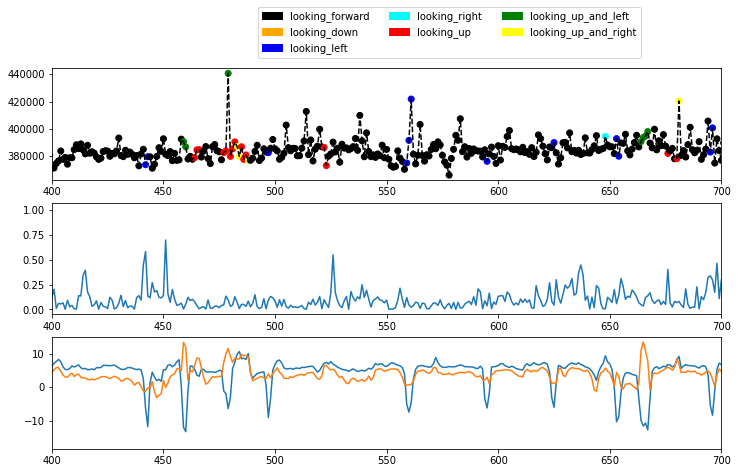

In [8]:
xlim0,xlim1=400,700

fig=plt.figure(figsize=(12,7))
ax=fig.add_subplot(311)
map_dict=dict(zip(['looking_forward', 'looking_down', 'looking_left', 'looking_right',
       'looking_up', 'looking_up_and_left', 'looking_up_and_right'],['k', 'orange', 'blue', 'cyan', 'red',
                                                                     'green', 'yellow']))
labels=df['level'].map(map_dict)
ax.scatter(range(doppz.shape[0]),doppz[:,:,8:18].reshape(-1,160).sum(axis=1),c=labels)
ax.plot(range(doppz.shape[0]),doppz[:,:,8:18].reshape(-1,160).sum(axis=1),linestyle='--',c='k')
ax.set_xlim(xlim0,xlim1)

pathes = [mpatches.Patch(color=c, label=v) for v,c in map_dict.items()]
ax.legend(handles=pathes,ncol=3,bbox_to_anchor=(0.3, 1.05))

ax=fig.add_subplot(312)
ax.plot(abs(df['acc'] - 10.518497809158944))
ax.set_xlim(xlim0,xlim1)

ax=fig.add_subplot(313)
ax.plot(df['y'])
ax.plot(df['x'])

ax.set_xlim(xlim0,xlim1)

In [9]:
norm=lambda e: (e-e.mean())/e.std()

/home/argha/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='acc'>

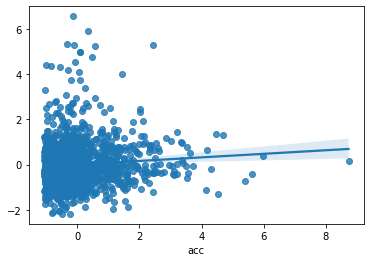

In [10]:
sns.regplot(norm(abs(df['acc'] - 10.518497809158944)),
            norm(doppz[:,:,8:18].reshape(-1,160).sum(axis=1)))

<AxesSubplot:xlabel='y'>

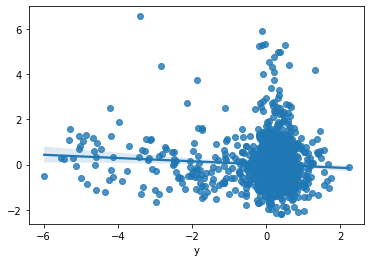

In [11]:
sns.regplot(norm(df['y']),
            norm(doppz[:,:,8:18].reshape(-1,160).sum(axis=1)))

In [12]:
X=doppz[:,:,8:18].reshape(-1,160)

In [13]:
Y=df['level'].values

In [14]:
rf=RandomForestClassifier()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [16]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [17]:
pred=rf.predict(X_train)

In [18]:
print(classification_report(y_train,pred))

                      precision    recall  f1-score   support

        looking_down       1.00      1.00      1.00         6
     looking_forward       1.00      1.00      1.00       847
        looking_left       1.00      1.00      1.00        26
       looking_right       1.00      1.00      1.00         6
          looking_up       1.00      1.00      1.00        31
 looking_up_and_left       1.00      1.00      1.00        13
looking_up_and_right       1.00      1.00      1.00        11

            accuracy                           1.00       940
           macro avg       1.00      1.00      1.00       940
        weighted avg       1.00      1.00      1.00       940



In [19]:
pred=rf.predict(X_test)

In [20]:
print(classification_report(y_test,pred))

                     precision    recall  f1-score   support

    looking_forward       0.92      1.00      0.96       426
       looking_left       0.00      0.00      0.00        11
      looking_right       0.00      0.00      0.00         2
         looking_up       0.00      0.00      0.00        21
looking_up_and_left       0.00      0.00      0.00         3

           accuracy                           0.92       463
          macro avg       0.18      0.20      0.19       463
       weighted avg       0.85      0.92      0.88       463



/home/argha/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/argha/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/argha/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
